<h1>1.Obtaining a dataset</h1>


In [103]:
import pandas as pd

df = pd.read_csv("train.csv")

train_df = df[["GrLivArea","YearBuilt", "SalePrice", "LotArea"]]
train_df

,GrLivArea,YearBuilt,SalePrice,LotArea
0,1710,2003,208500,8450
1,1262,1976,181500,9600
2,1786,2001,223500,11250
3,1717,1915,140000,9550
4,2198,2000,250000,14260
...,...,...,...,...
1455,1647,1999,175000,7917
1456,2073,1978,210000,13175
1457,2340,1941,266500,9042
1458,1078,1950,142125,9717


<h1>2.Investigating the dataset itself</h1>


## House Prices - Advanced Regression Techniques Dataset

The dataset is designed for predicting the final sale price of homes in Ames, Iowa. It includes 79 explanatory variables describing different aspects of residential homes. 

### Key Data Fields
- **SalePrice**: The property's sale price in dollars.
- **MSSubClass**: The building class.
- **MSZoning**: The general zoning classification.
- **LotFrontage**: Linear feet of street connected to the property.
- **LotArea**: Lot size in square feet.
- **OverallQual**: Overall material and finish quality.
- **YearBuilt**: Original construction date.



<h1>3.Checking the data</h1>


In [104]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:

print("Numerical data",len(df.dtypes[df.dtypes != "object"].index))

print("Text data",len(df.dtypes[df.dtypes == "object"].index))

Numerical data 38
Text data 43


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Target Variable: SalePrice

In [107]:

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h1>4.Dealing with missing values</h1>


<Axes: >

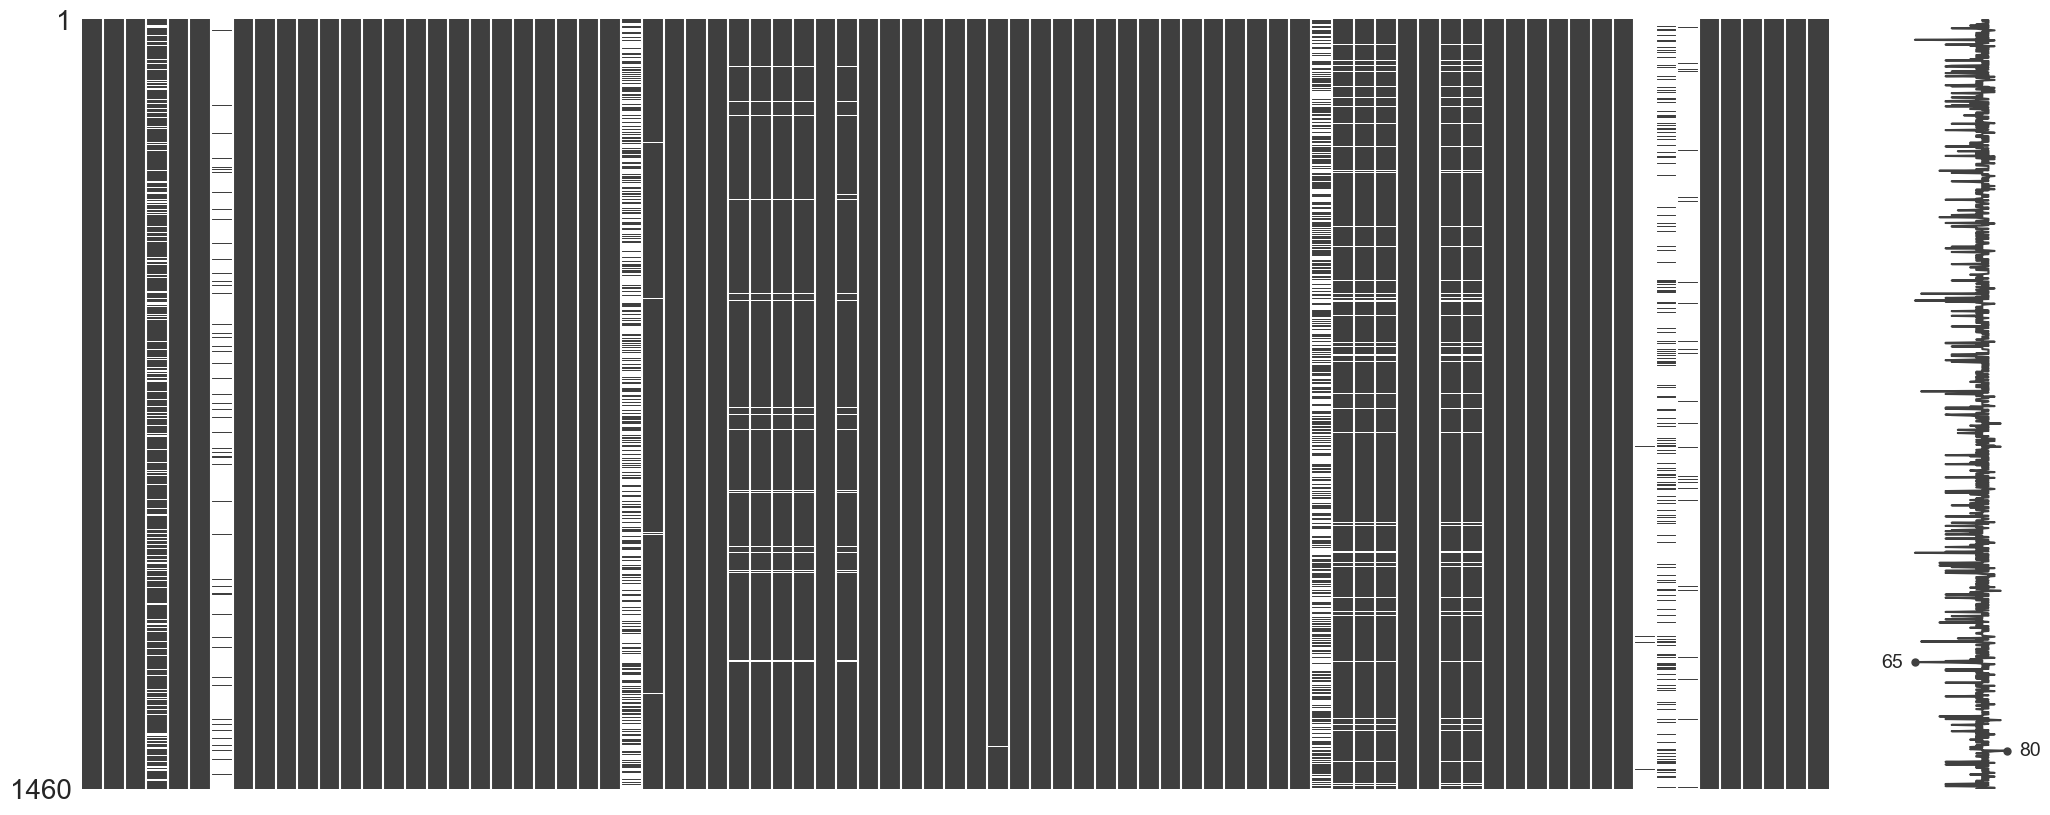

In [108]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [109]:
total_missing_val = df.isnull().sum()
percent_missing_val = df.isnull().mean() * 100

missing_values = pd.concat([total_missing_val, percent_missing_val], axis=1, keys=['Total', 'Percentage(%)'])
missing_values.head(13)

,Total,Percentage(%)
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,93.767123
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


In [110]:
df = df.drop(columns=df.columns[df.isnull().sum() >= 5])
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<h1>5.Terminology research</h1>


## Kurtosis
Kurtosis measures the tails of a distribution:

- **Mesokurtic**: Moderate tails, like a normal distribution.
- **Leptokurtic**: Heavy tails, indicating more outliers.
- **Platykurtic**: Light tails, indicating fewer outliers.
Excess kurtosis centers a normal distribution around zero

## Skewness
Skewness measures the asymmetry of a distribution:

- **Negative Skew**: Longer left tail, mean < median.
- **Positive Skew**: Longer right tail, mean > median.
Skewness identifies the direction and extent of skew in data

<h1>6.Confirming distribution</h1>


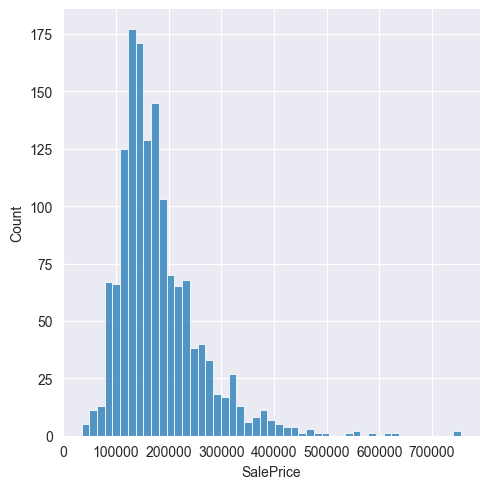

In [111]:
import seaborn as sns
sns.displot(df["SalePrice"])

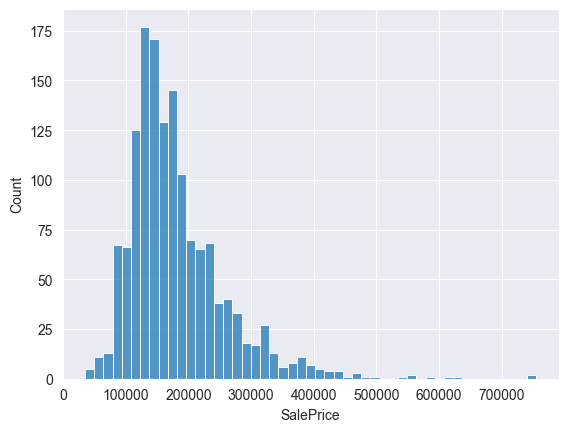

In [112]:
sns.histplot(df['SalePrice']);

In [113]:
skewness = df['SalePrice'].skew()
kurtosis = df['SalePrice'].kurtosis()

print(skewness)
print(kurtosis)

1.8828757597682129
6.536281860064529


C:\Users\Z240Home\AppData\Local\Temp\ipykernel_20928\3208418038.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trns_vars)


<Axes: xlabel='SalePrice', ylabel='Density'>

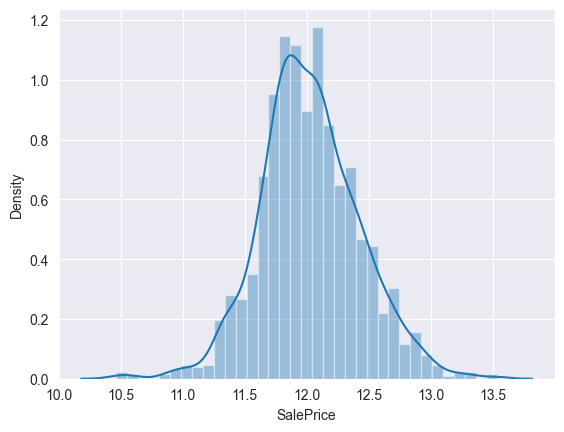

In [114]:
import numpy as np
trns_vars = np.log(df['SalePrice'])
sns.distplot(trns_vars)

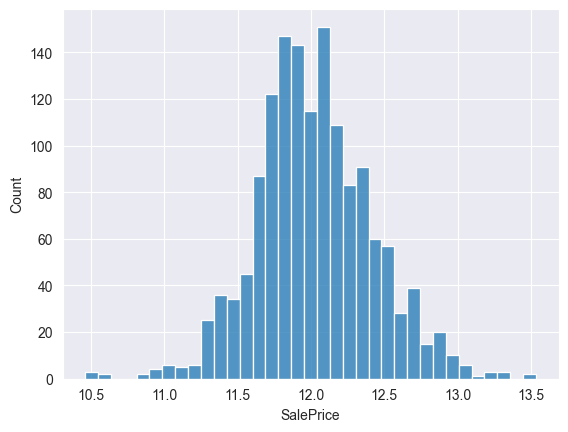

In [115]:
sns.histplot(trns_vars);

In [116]:
trns_vars_skew = trns_vars.skew()
trns_vars_kurt = trns_vars.kurt()

print(trns_vars_skew)
print(trns_vars_kurt)

0.12133506220520406
0.8095319958036296


<h1>7.Confirming the correlation coefficient</h1>


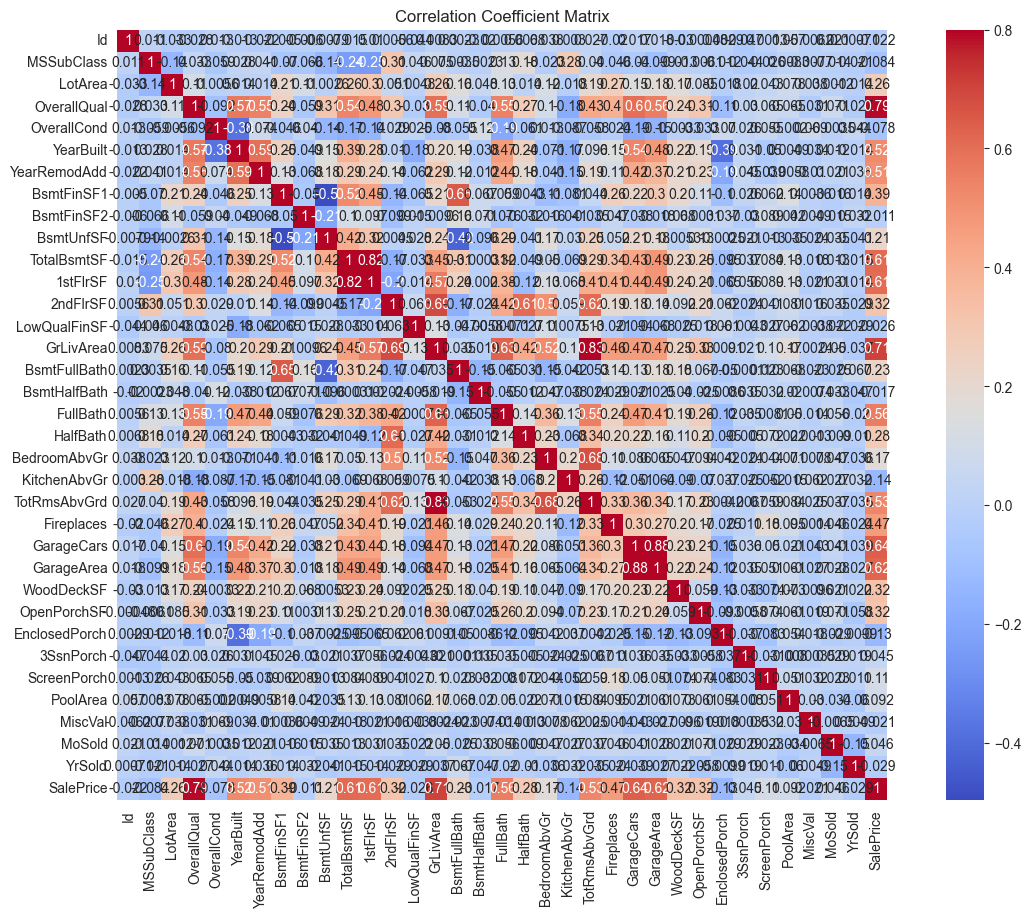

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
plt.figure(figsize=(15, 10))
plt.title('Correlation Coefficient Matrix')
sns.heatmap(corr, vmax=.8, square=True, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [118]:
corr_target = corr[['SalePrice']].sort_values(by=['SalePrice'], ascending=False)
corr_target[1:11]
     

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


In [119]:
target_matrix = df[corr_target[1:11].index]
display(target_matrix)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


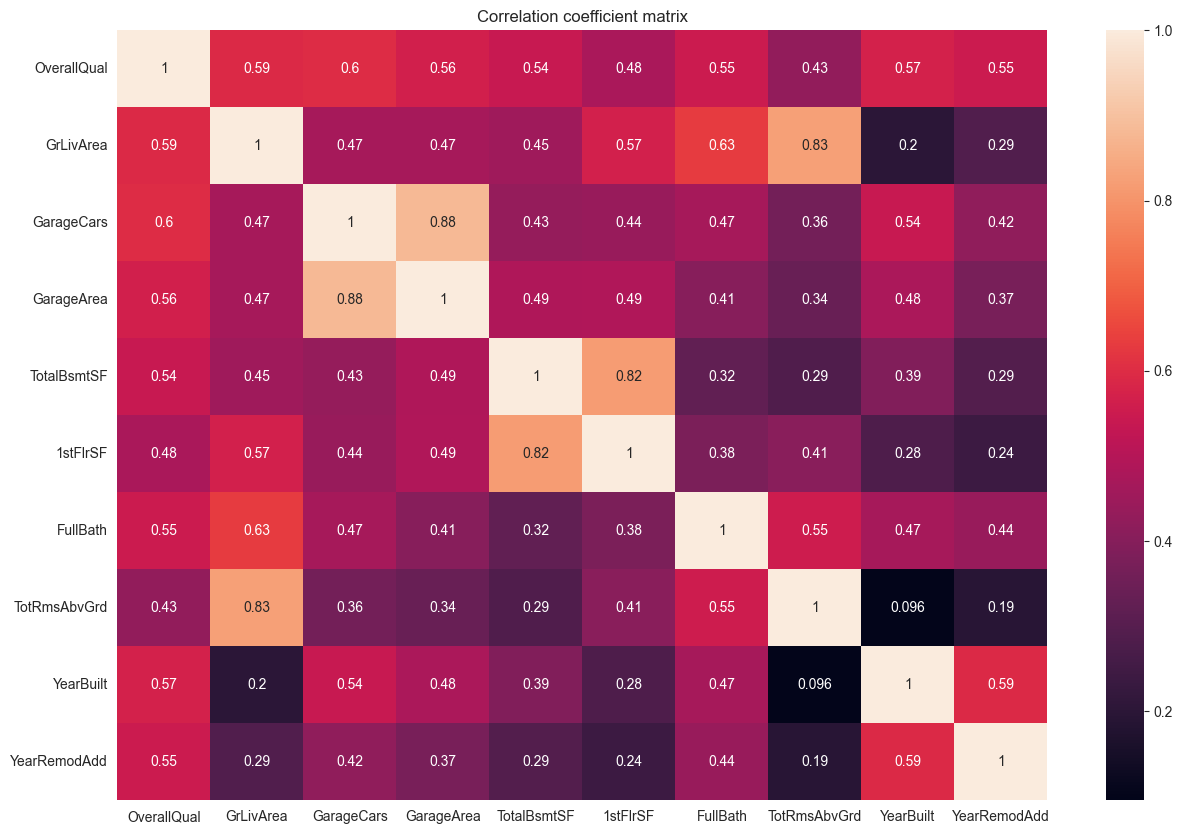

In [120]:

plt.subplots(figsize=(15,10))
plt.title('Correlation coefficient matrix')
sns.heatmap(target_matrix.corr(), vmax=1, annot=True)
plt.show()

It is evident that some features exhibit high dependency on each other, significantly contributing to the target feature, SalePrice. For instance, the top three correlation coefficients among the features are:

- **GarageCars and GarageArea**: These two features have a high correlation of 0.88, indicating a strong relationship between the number of cars the garage can hold and the garage's area.
- **1stFlrSF and TotalBsmtSF**: The first-floor square footage and the total basement square footage show a correlation of 0.82, suggesting a significant association between these two areas.
- **GrLivArea and TotRmsAbvGrd**: The above-ground living area and the total number of rooms above grade (excluding bathrooms) have a correlation of 0.83, reflecting a strong link between these living spaces.

These combinations with high correlation coefficients are:

1. **GarageArea and GarageCars**: 0.88
2. **1stFlrSF and TotalBsmtSF**: 0.82
3. **GrLivArea and TotRmsAbvGrd**: 0.83